# Support Vector Machines

*You are seeing the
notebook output generated by
[Literate.jl](https://github.com/fredrikekre/Literate.jl) from the
[Julia source file](https://github.com/JuliaGaussianProcesses/KernelFunctions.jl/blob/master/examples/support-vector-machine/script.jl).
The rendered HTML can be viewed [in the docs](https://juliagaussianprocesses.github.io/KernelFunctions.jl/dev/examples/support-vector-machine/).*

TODO: introduction

We first load the packages we will need in this notebook:

In [1]:
using Distributions
using KernelFunctions
using LIBSVM
using LinearAlgebra
using Plots
using Random

# Set plotting theme
theme(:wong)
default(; legendfontsize=15.0, ms=5.0);

# Set seed
Random.seed!(1234);

## Data Generation

We first generate a mixture of two Gaussians in 2 dimensions

In [2]:
xmin = -3;
xmax = 3; # Limits for sampling μ₁ and μ₂
μ = rand(Uniform(xmin, xmax), 2, 2) # Sample 2 Random Centers

2×2 Matrix{Float64}:
 0.545068   0.397424
 1.60078   -0.239488

We then sample both the input $x$ and the class $y$:

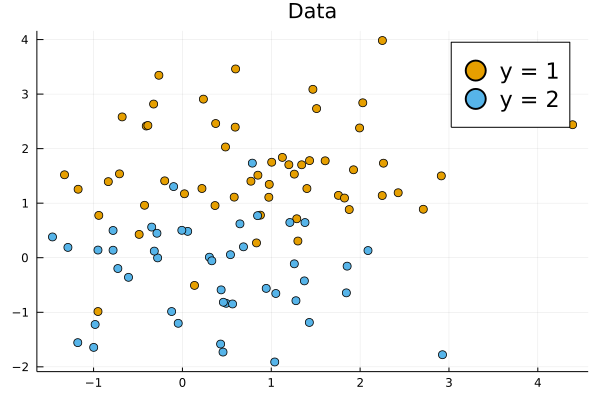

In [3]:
N = 100 # Number of samples
y = rand((-1, 1), N) # Select randomly between the two classes
x = Vector{Vector{Float64}}(undef, N) # We preallocate x
x[y .== 1] = [rand(MvNormal(μ[:, 1], I)) for _ in 1:count(y .== 1)] # Features for samples of class 1
x[y .== -1] = [rand(MvNormal(μ[:, 2], I)) for _ in 1:count(y .== -1)] # Features for samples of class 2
scatter(getindex.(x[y .== 1], 1), getindex.(x[y .== 1], 2); label="y = 1", title="Data")
scatter!(getindex.(x[y .== -1], 1), getindex.(x[y .== -1], 2); label="y = 2")

Select randomly between two classes:

In [4]:
y_train = rand([-1, 1], N);

Random attributes for both classes:

In [5]:
X = Matrix{Float64}(undef, 2, N)
rand!(MvNormal(randn(2), I), view(X, :, y_train .== 1))
rand!(MvNormal(randn(2), I), view(X, :, y_train .== -1));
x_train = ColVecs(X);

We create a 2D grid based on the maximum values of the data

In [6]:
test_range = range(floor(Int, minimum(X)), ceil(Int, maximum(X)); length=100)
x_test = ColVecs(mapreduce(collect, hcat, Iterators.product(test_range, test_range)));

N_test = 100 # Size of the grid
xgrid = range(extrema(vcat(x...)) .* 1.1...; length=N_test) # Create a 1D grid
xgrid_v = vec(collect.(Iterators.product(xgrid, xgrid))); # Combine into a 2D grid

Create kernel function:

In [7]:
k = SqExponentialKernel() ∘ ScaleTransform(2.0)
λ = 1.0; # Regularization parameter

### Predictor
We create a function to return the optimal prediction for a test data `x_new`

[LIBSVM](https://github.com/JuliaML/LIBSVM.jl) can make use of a pre-computed kernel matrix.
KernelFunctions.jl can be used to produce that.
Precomputed matrix for training (corresponds to linear kernel)

In [8]:
model = svmtrain(kernelmatrix(k, x_train), y_train; kernel=LIBSVM.Kernel.Precomputed)

LIBSVM.SVM{Int64}(LIBSVM.SVC, LIBSVM.Kernel.Precomputed, nothing, 1, 2, [1, -1], Int32[1, 2], Float64[], Int32[], LIBSVM.SupportVectors{Vector{Int64}, Matrix{Int64}}(61, Int32[30, 31], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [1 2 … 95 98], Int32[1, 2, 5, 20, 24, 27, 29, 33, 34, 36  …  71, 72, 74, 85, 89, 90, 92, 93, 95, 98], LIBSVM.SVMNode[LIBSVM.SVMNode(0, 1.0), LIBSVM.SVMNode(0, 2.0), LIBSVM.SVMNode(0, 5.0), LIBSVM.SVMNode(0, 20.0), LIBSVM.SVMNode(0, 24.0), LIBSVM.SVMNode(0, 27.0), LIBSVM.SVMNode(0, 29.0), LIBSVM.SVMNode(0, 33.0), LIBSVM.SVMNode(0, 34.0), LIBSVM.SVMNode(0, 36.0)  …  LIBSVM.SVMNode(0, 71.0), LIBSVM.SVMNode(0, 72.0), LIBSVM.SVMNode(0, 74.0), LIBSVM.SVMNode(0, 85.0), LIBSVM.SVMNode(0, 89.0), LIBSVM.SVMNode(0, 90.0), LIBSVM.SVMNode(0, 92.0), LIBSVM.SVMNode(0, 93.0), LIBSVM.SVMNode(0, 95.0), LIBSVM.SVMNode(0, 98.0)]), 0.0, [1.0; 1.0; … ; -1.0; -0.46390904755930035], Float64[], Float64[], [-0.00112065353934565], 3, 0.01, 200.0, 0.001, 1.0

We predict the value of y on this grid and plot it against the data:

Precomputed matrix for prediction

In [9]:
y_pr, _ = svmpredict(model, kernelmatrix(k, x_train, x_test));

Compute prediction on a grid:

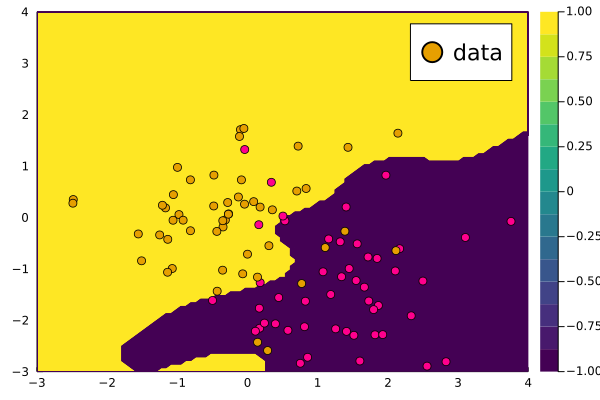

In [10]:
contourf(test_range, test_range, y_pr; label="predictions")
scatter!(X[1, :], X[2, :]; color=y_train, lab="data", widen=false)
#scatter!(getindex.(x[y .== 1], 1), getindex.(x[y .== 1], 2); label="y = 1")
#scatter!(getindex.(x[y .== -1], 1), getindex.(x[y .== -1], 2); label="y = 2")
#xlims!(extrema(xgrid))
#ylims!(extrema(xgrid))

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*